# Week_5_ Review 
### - Date : 24 September 2025
### - Author : Min Set Khant


In [1]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for style
sns.set(style='whitegrid', font_scale= 1.2)

### Type Coercion
Explicit vs. implicit type coercion

Explicit type coercion: You ask Python to change the type of a variable

Implicit type coercion: Python changes / makes assumptions for you about the type of a variable without you asking for it

This happens because in a series, you can’t have multiple types of values

In [2]:
# Create a sample dataframe
df= pd.DataFrame({'x':[1,2,3], # Numeric
                  'y':['a','b','c'], # Character
                  'z':[True, False, True] # Boolean
                  })

df

,x,y,z
0,1,a,True
1,2,b,False
2,3,c,True


In [3]:
# Explict coercion
# -- from Numeric to Character
df['x_new']= df['x'].astype(str) # Can do
df

,x,y,z,x_new
0,1,a,True,1
1,2,b,False,2
2,3,c,True,3


In [4]:
# Explict coercion
# -- from Character to Numeric 
df["y_new"]=pd.to_numeric(df["y"], errors='coerce') # Can't change

df

,x,y,z,x_new,y_new
0,1,a,True,1,NaN
1,2,b,False,2,NaN
2,3,c,True,3,NaN


In [5]:
#Implicit coercion
# Which of the column types were implicitly coerced?
df = pd.DataFrame({
    'w': [1, 2, 3],
    'x': ['a', 'b', 4],
    'y': ['c', 'd', np.nan],
    'z': [5, 6, np.nan],
})
df


,w,x,y,z
0,1,a,c,5.0
1,2,b,d,6.0
2,3,4,NaN,NaN


In [6]:
#Collecting data
#Suppose you conduct a survey and ask students their student ID number and number of credits they’re taking this semester. What is the type of each variable?
survey_raw = pd.DataFrame({
    'student_id': [273674, 298765, 287129, "I don't remember"],
    'n_credits': [4, 4.5, "I'm not sure yet", "2 - underloading"]
})
survey_raw

,student_id,n_credits
0,273674,4
1,298765,4.5
2,287129,I'm not sure yet
3,I don't remember,2 - underloading


In [16]:
# Cleaing Date with the orginal Way
survey = survey_raw.copy()
survey['student_id'] = survey['student_id'].replace("I don't remember", np.nan)
survey['n_credits'] = survey['n_credits'].replace({
    "I'm not sure yet": np.nan,
    "2 - underloading": "2"
})
survey['n_credits'] = pd.to_numeric(survey['n_credits'])
survey

/var/folders/jf/1b91kr5d1k773y5y7tm0sfbh0000gn/T/ipykernel_41301/4141026469.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey['student_id'] = survey['student_id'].replace("I don't remember", np.nan)


,student_id,n_credits
0,273674.0,4.0
1,298765.0,4.5
2,287129.0,NaN
3,NaN,2.0


In [ ]:
# Cleaning data - alternative way (Smart Way)
survey = survey_raw.copy()
survey['student_id'] =pd.to_numeric(survey['student_id'], errors='coerce') # Cleaning with "coerce"
survey['n_credits']=pd.to_numeric(survey["n_credits"], errors="coerce")
survey

,student_id,n_credits
0,273674.0,4.0
1,298765.0,4.5
2,287129.0,NaN
3,NaN,NaN


### Recap: Type coercion

If variables in a DataFrame have multiple types of values, Python will coerce them into a single type, which may or may not be what you want.

If what Python does by default is not what you want, you can use explicit coercion functions like pd.to_numeric(), astype(), etc., to turn them into the types you want them to be, which will generally also involve cleaning up the features of the data that caused the unwanted implicit coercion in the first place.

## Aesthetic Mappings


In [8]:
# get the data form the "Loan_50" CSV data
loan50 = pd.read_csv("loans_full_schema copy.csv")
loan50.head()


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


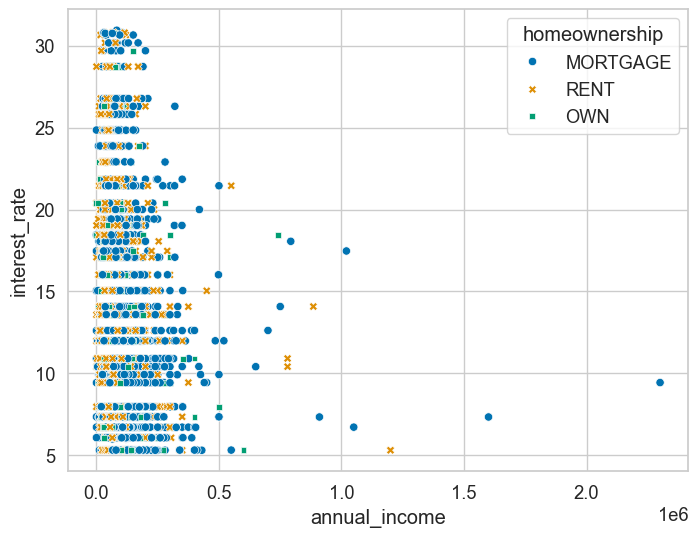

In [ ]:
# Aesthic Mapping
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan50, x='annual_income', y='interest_rate', hue='homeownership', style='homeownership', palette='colorblind')
plt.show()

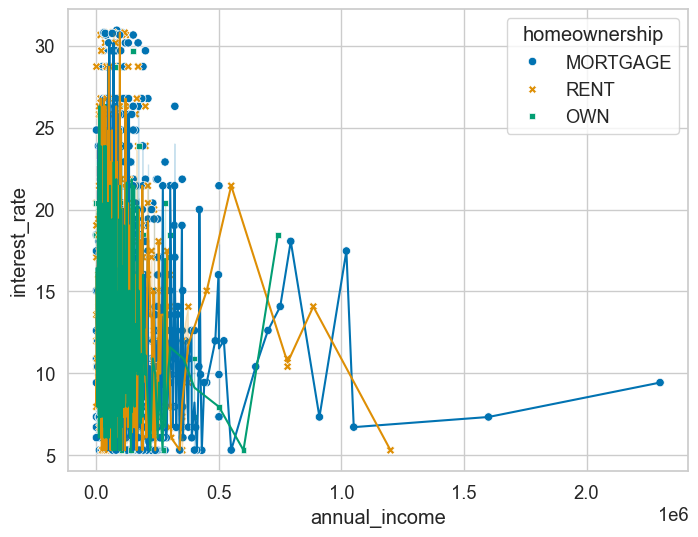

In [11]:
# Combine Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan50, x='annual_income', y='interest_rate', hue='homeownership', style='homeownership', palette='colorblind')
sns.lineplot(data=loan50, x='annual_income', y='interest_rate', hue='homeownership', legend=False, palette='colorblind')
plt.show()

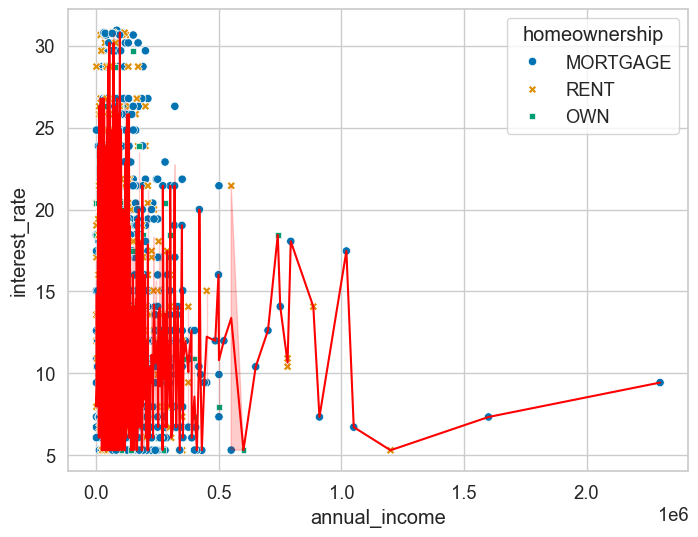

In [12]:
# Combine Plot with color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan50, x='annual_income', y='interest_rate', hue='homeownership', style='homeownership', palette='colorblind')
sns.lineplot(data=loan50, x='annual_income', y='interest_rate', color = 'red',legend=False,)
plt.show()

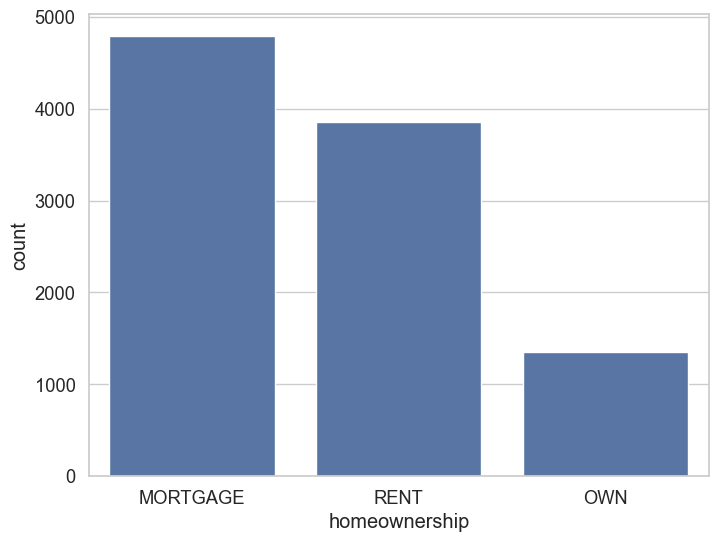

In [13]:
# Bar Plot
plt.figure(figsize=(8,6))
sns.countplot(loan50, x='homeownership')
plt.show()

In [18]:
# Bar plot - reordered
loan50['homeownership'] = pd.Categorical(loan50['homeownership'], categories=['MORTGAGR', 'RENT', 'OWN'])

loan50

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,NaN,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,NaN,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,NaN,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,NaN,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,NaN,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,NaN,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,NaN,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,NaN,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,NaN,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [33]:
loan50["verified_income"] = pd.Categorical(loan50["verified_income"], categories=['Not Verified', 'Source Verified'])

loan50["verified_income"].value_counts()

verified_income
Source Verified    4116
Not Verified       3594
Name: count, dtype: int64

In [34]:
# Under the Hood
print(type(loan50['homeownership']))

<class 'pandas.core.series.Series'>


In [35]:
print(loan50['homeownership'].dtype)

category


In [36]:
print(loan50['homeownership'].cat.categories)

Index(['MORTGAGR', 'RENT', 'OWN'], dtype='object')


In [37]:
print(loan50['homeownership'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    NaN
9996    NaN
9997    NaN
9998    NaN
9999    NaN
Name: homeownership, Length: 10000, dtype: category
Categories (3, object): ['MORTGAGR', 'RENT', 'OWN']


In [38]:
# Aside: Filtering
loan50['homeownership_new'] = loan50['homeownership'].apply(lambda x: "don't own" if x in ['rent', 'mortgage'] else x)
loan50[['homeownership', 'homeownership_new']].drop_duplicates()

,homeownership,homeownership_new
0,NaN,NaN
